In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

## Application Data

In [2]:
df1=pd.read_csv(r'application_data.csv')
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Cleaning

### Drop Columns which have >40% of nulls in them

In [3]:
dropcol_1=df1.columns[df1.isnull().sum()/df1.shape[0]*100>40]

In [4]:
dropcol_1

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [5]:
df1.drop(columns=dropcol_1,axis=1,inplace=True)

((df1.isnull().sum()/len(df1)) * 100).sort_values(ascending=False)

In [7]:
df1.shape

(307511, 73)

### Imputing Null Values in df1

In [8]:
df1.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
                               ...  
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
TARGET                             0
REG_CITY_NOT_LIVE_CITY             0
Length: 73, dtype: int64

#### Impute OCCUPATION_TYPE (What kind of occupation does the client have)

In [9]:
df1['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [10]:
df1['OCCUPATION_TYPE']=df1['OCCUPATION_TYPE'].fillna('Not Known')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Not Known'),
  Text(5, 0, 'Drivers'),
  Text(6, 0, 'Sales staff'),
  Text(7, 0, 'Cleaning staff'),
  Text(8, 0, 'Cooking staff'),
  Text(9, 0, 'Private service staff'),
  Text(10, 0, 'Medicine staff'),
  Text(11, 0, 'Security staff'),
  Text(12, 0, 'High skill tech staff'),
  Text(13, 0, 'Waiters/barmen staff'),
  Text(14, 0, 'Low-skill Laborers'),
  Text(15, 0, 'Realty agents'),
  Text(16, 0, 'Secretaries'),
  Text(17, 0, 'IT staff'),
  Text(18, 0, 'HR staff')])

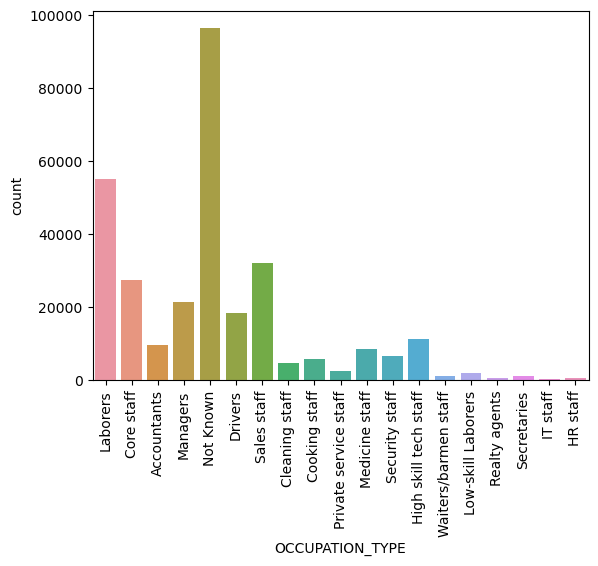

In [11]:
sns.countplot(x='OCCUPATION_TYPE',data=df1)
plt.xticks(rotation=90)

#### Impute EXT_SOURCE_3 refers to one of the variables that are used to assess the creditworthiness of a borrower. Specifically, EXT_SOURCE_3 is a numerical variable that represents a credit score or credit-related metric obtained from external sources, such as credit bureaus or other financial institutions. Here's a detailed description of EXT_SOURCE_3 and its importance in credit risk analysis:

In [12]:
df1["EXT_SOURCE_3"].skew()

-0.4093904596160267

<Axes: ylabel='Frequency'>

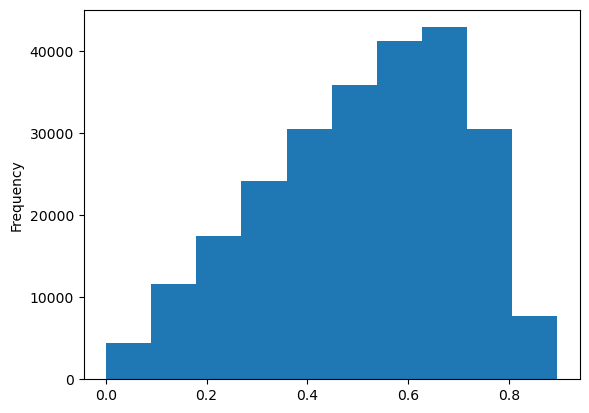

In [13]:
df1['EXT_SOURCE_3'].plot.hist()

In [14]:
me=df1['EXT_SOURCE_3'].median()
df1['EXT_SOURCE_3'].fillna(me,inplace=True)

#### Impute AMT_REQ_CREDIT_BUREAU_YEAR (quantifies the number of times a borrower's credit information has been requested from credit bureaus in the past year. Credit inquiries are typically made by lenders, financial institutions, or creditors when evaluating an applicant's creditworthiness.)

In [15]:
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].skew()

1.243590004141659

<Axes: ylabel='Frequency'>

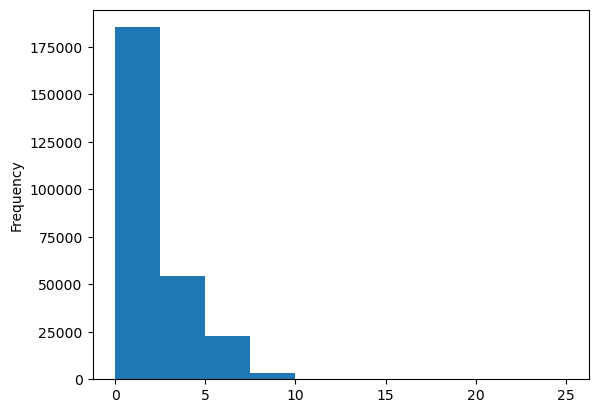

In [16]:
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist()

In [17]:
me=df1['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(me,inplace=True)

#### Impute AMT_REQ_CREDIT_BUREAU_QRT (Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)

In [18]:
df1['AMT_REQ_CREDIT_BUREAU_QRT'].skew()

134.3657760491256

<Axes: ylabel='Frequency'>

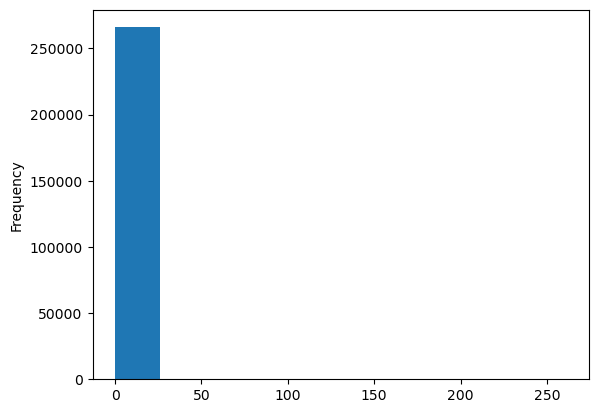

In [19]:
df1['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist()

In [20]:
me=df1['AMT_REQ_CREDIT_BUREAU_QRT'].median()
df1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(me,inplace=True)

#### Impute AMT_REQ_CREDIT_BUREAU_MON (Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application))

In [21]:
df1['AMT_REQ_CREDIT_BUREAU_MON'].skew()

7.804848087437468

<Axes: ylabel='Frequency'>

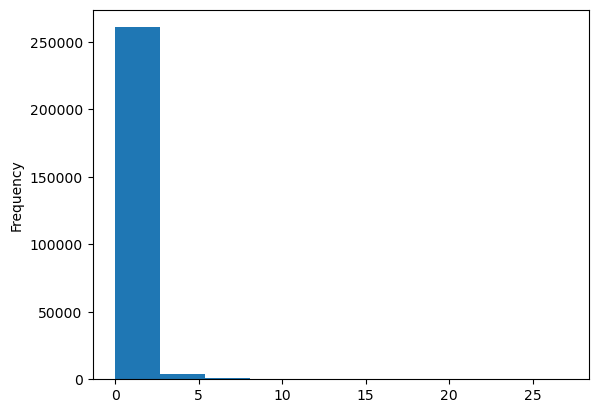

In [22]:
df1['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist()

In [23]:
me=df1['AMT_REQ_CREDIT_BUREAU_MON'].median()
df1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(me,inplace=True)

In [24]:
((df1.isnull().sum()/len(df1)) * 100).sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

#### Impute AMT_REQ_CREDIT_BUREAU_WEEK (Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)

In [25]:
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].skew()

9.293572551814966

<Axes: ylabel='Frequency'>

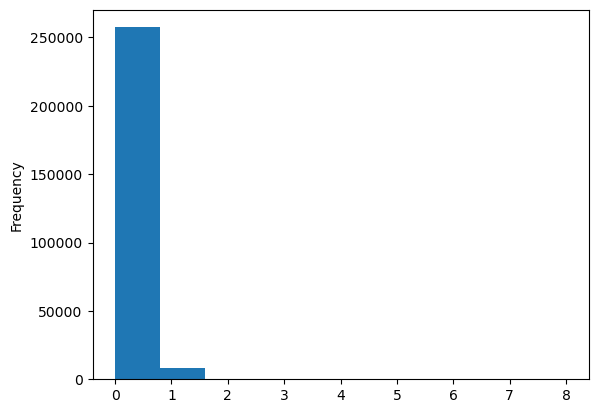

In [26]:
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist()

In [27]:
me=df1['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(me,inplace=True)

#### Impute AMT_REQ_CREDIT_BUREAU_DAY Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)

In [28]:
df1['AMT_REQ_CREDIT_BUREAU_DAY'].skew()

27.043504708921265

<Axes: ylabel='Frequency'>

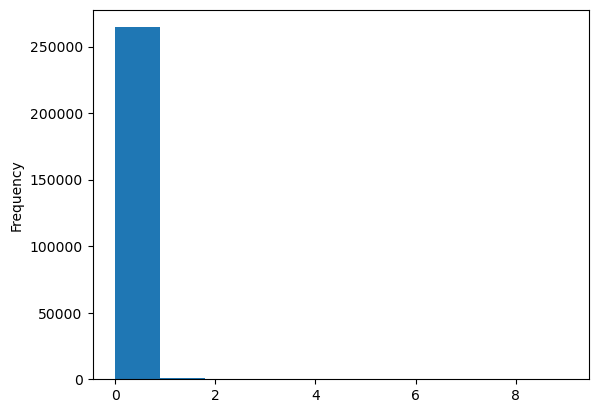

In [29]:
df1['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist()

In [30]:
me=df1['AMT_REQ_CREDIT_BUREAU_DAY'].median()
df1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(me,inplace=True)

#### Impute AMT_REQ_CREDIT_BUREAU_HOUR Number of enquiries to Credit Bureau about the client one hour before application

In [31]:
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].skew()

14.534062061826708

<Axes: ylabel='Frequency'>

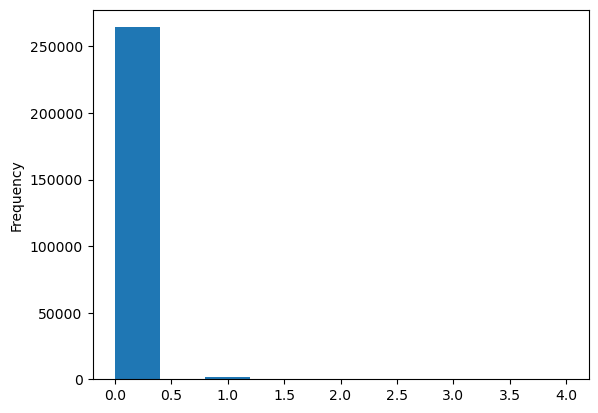

In [32]:
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist()

In [33]:
me=df1['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(me,inplace=True)

#### Impute NAME_TYPE_SUITE Who accompanied client when applying for the previous application

In [34]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [35]:
mo=df1['NAME_TYPE_SUITE'].mode()[0]
df1['NAME_TYPE_SUITE'].fillna(mo,inplace=True)

#### Impute OBS_60_CNT_SOCIAL_CIRCLE How many observation of client's social surroundings with observable 60 DPD (days past due) default

In [36]:
#Count is imputed with zero

In [37]:
df1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)

In [38]:
((df1.isnull().sum()/len(df1)) * 100).sort_values(ascending=False)

OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
                                 ...   
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

#### Impute OBS_30_CNT_SOCIAL_CIRCLE How many observation of client's social surroundings with observable 30 DPD (days past due) default

In [39]:
# Count is imputed with zero

In [40]:
df1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)

#### Impute DEF_30_CNT_SOCIAL_CIRCLE How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

In [41]:
# Count is imputed with zero

In [42]:
df1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)

#### Impute DEF_30_CNT_SOCIAL_CIRCLE How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

In [43]:
# Count is imputed with zero

In [44]:
df1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)

#### Impute EXT_SOURCE_2 (is a specific variable or data source that is often used to assess an individual's creditworthiness. EXT_SOURCE_2 is one of the external data sources or features that can be found in a credit report and is typically provided by credit bureaus and financial institutions as part of their credit scoring and risk assessment processes.)

In [45]:
df1['EXT_SOURCE_2'].skew()

-0.7935760449636996

<Axes: ylabel='Frequency'>

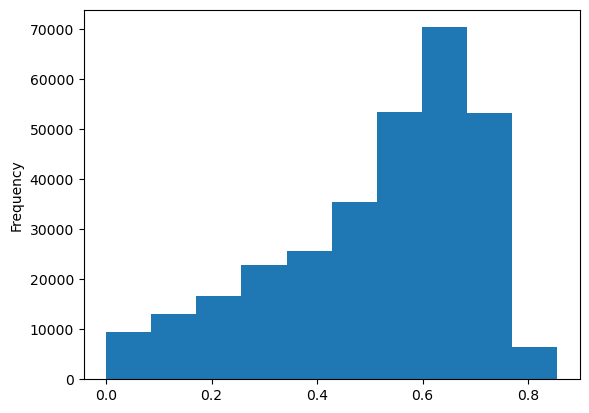

In [46]:
df1['EXT_SOURCE_2'].plot.hist()

In [47]:
me=df1['EXT_SOURCE_2'].median()
df1['EXT_SOURCE_2'].fillna(me,inplace=True)

#### Impute AMT_GOODS_PRICE (Goods price of good that client asked for (if applicable) on the previous application)

In [48]:
df1['AMT_GOODS_PRICE'].skew()

1.3490003414747445

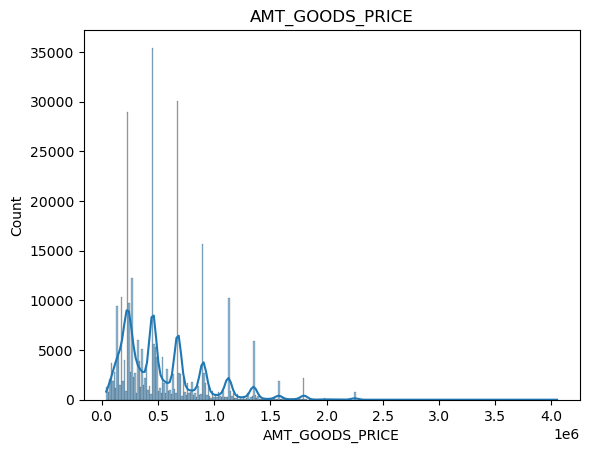

In [49]:
sns.histplot(df1, x=df1['AMT_GOODS_PRICE'], kde=True)
plt.title('AMT_GOODS_PRICE')
plt.show()

In [50]:
me=df1['AMT_GOODS_PRICE'].median()
df1['AMT_GOODS_PRICE'].fillna(me,inplace=True)

In [51]:
((df1.isnull().sum()/len(df1)) * 100).sort_values(ascending=False)

DEF_60_CNT_SOCIAL_CIRCLE      0.332021
AMT_ANNUITY                   0.003902
CNT_FAM_MEMBERS               0.000650
DAYS_LAST_PHONE_CHANGE        0.000325
FLAG_DOCUMENT_2               0.000000
                                ...   
FLAG_CONT_MOBILE              0.000000
FLAG_WORK_PHONE               0.000000
FLAG_EMP_PHONE                0.000000
FLAG_MOBIL                    0.000000
AMT_REQ_CREDIT_BUREAU_YEAR    0.000000
Length: 73, dtype: float64

#### Impute DEF_60_CNT_SOCIAL_CIRCLE (How many observation of client's social surroundings defaulted on 60 (days past due) DPD)

In [52]:
# Count is imputed with zero

In [53]:
df1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)

#### Impune AMT_ANNUITY (refers to a variable representing the annual installment or payment amount for a financial obligation, such as a loan or a mortgage. This variable is used to assess an individual's or a borrower's financial capacity to meet their financial obligations, including loan repayments.)

In [54]:
df1['AMT_ANNUITY'].skew()

1.5797773638612507

<Axes: ylabel='Frequency'>

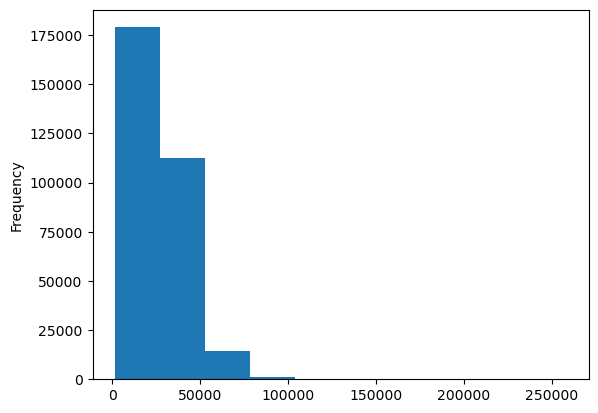

In [55]:
df1['AMT_ANNUITY'].plot.hist()

In [56]:
me=df1['AMT_ANNUITY'].median()
df1['AMT_ANNUITY'].fillna(me,inplace=True)

#### Impute CNT_FAM_MEMBERS (How many family members does client have)

In [57]:
df1['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [58]:
mv=df1['CNT_FAM_MEMBERS'].median()
df1['CNT_FAM_MEMBERS'].fillna(mv,inplace=True)

#### Impune DAYS_LAST_PHONE_CHANGE (How many days before application did client change phone)

In [59]:
df1['DAYS_LAST_PHONE_CHANGE'].skew()

-0.7136056678591622

<Axes: ylabel='Frequency'>

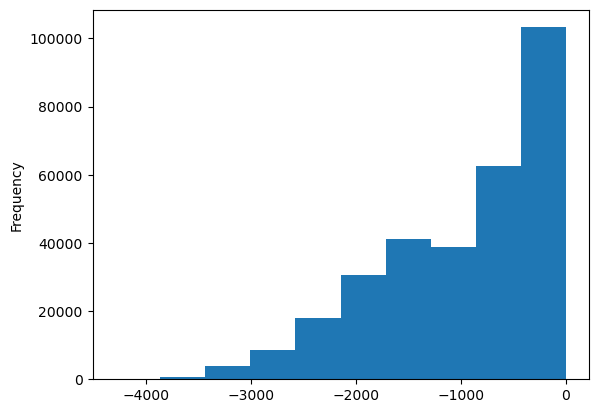

In [60]:
df1['DAYS_LAST_PHONE_CHANGE'].plot.hist()

In [61]:
mo=df1['DAYS_LAST_PHONE_CHANGE'].mode()[0]
df1['DAYS_LAST_PHONE_CHANGE'].fillna(mo,inplace=True)

#### Impune FLAG_DOCUMENT_2 (typically refers to a binary or categorical variable that represents whether a specific document (in this case, document number 2) has been provided or is on file in a loan or credit application)

In [62]:
df1['FLAG_DOCUMENT_2'].value_counts()

0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64

In [63]:
df1['FLAG_DOCUMENT_2'].fillna(0,inplace=True)

In [64]:
df1.shape

(307511, 73)

In [65]:
((df1.isnull().sum()/len(df1)) * 100).sort_values(ascending=False)

SK_ID_CURR                    0.0
REG_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_8               0.0
FLAG_DOCUMENT_7               0.0
FLAG_DOCUMENT_6               0.0
                             ... 
FLAG_CONT_MOBILE              0.0
FLAG_WORK_PHONE               0.0
FLAG_EMP_PHONE                0.0
FLAG_MOBIL                    0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 73, dtype: float64

#### Find Negative Values and make it absolute

In [66]:
num_cols=[]
for col in df1.columns:
    if df1[col].dtype == 'int64' or df1[col].dtype=='float64':
        num_cols.append(df1[col].name)

In [67]:
neg_cols=[]
for i in num_cols:
    if(df1[i]<0).any():
        neg_cols.append(i)

In [68]:
neg_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [69]:
for col in neg_cols:
    df1[col]=df1[col].abs()

#### Find Categorical columns for imputing appropriately

In [70]:
cat_cols=[]
for col in df1.columns:
    if df1[col].dtype=='object':
        cat_cols.append(df1[col].name)

In [71]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [72]:
df1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [73]:
df1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [74]:
df1['CODE_GENDER'].replace('XNA',df1['CODE_GENDER'].mode()[0],inplace=True)

In [75]:
df1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [76]:
df1['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [77]:
df1['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [78]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [79]:
df1['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [80]:
df1['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [81]:
df1['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [82]:
df1['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [83]:
df1['OCCUPATION_TYPE'].value_counts()

Not Known                96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [84]:
df1['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [85]:
df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Create AGE_BINS from DAYS_BIRTH

In [86]:
df1['AGE']=(df1['DAYS_BIRTH'] / 365).round(2)
age_bins = [0, 20, 30, 40, 50, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51+']
df1['AGE_BINS'] = pd.cut(df1['AGE'], bins=age_bins, labels=age_labels, right=False)

In [87]:
df1['AGE_BINS']

0         21-30
1         41-50
2           51+
3           51+
4           51+
          ...  
307506    21-30
307507      51+
307508    41-50
307509    31-40
307510    41-50
Name: AGE_BINS, Length: 307511, dtype: category
Categories (5, object): ['0-20' < '21-30' < '31-40' < '41-50' < '51+']

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

## Previous Application Data

In [89]:
df2=pd.read_csv(r'E:\Data Science\Datasets\Credit Risk Analyzer\previous_application.csv')
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Drop Columns which have >40% of nulls in them

In [90]:
dropcol_2=df2.columns[df2.isnull().sum()/df2.shape[0]*100>40]

In [91]:
df2.drop(columns=dropcol_2,axis=1,inplace=True)

In [92]:
df2.shape

(1670214, 26)

In [93]:
((df2.isnull().sum()/len(df2)) * 100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

### Imputing Null Values in df2

In [94]:
df2['AMT_GOODS_PRICE'].skew()

3.0736896781923937

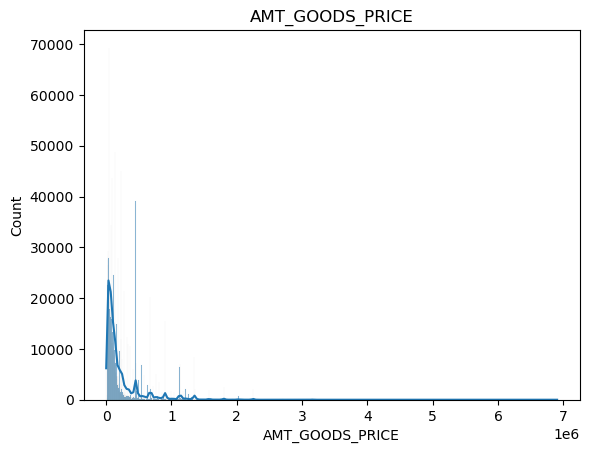

In [95]:
sns.histplot(df2, x=df2['AMT_GOODS_PRICE'], kde=True)
plt.title('AMT_GOODS_PRICE')
plt.show()

In [96]:
me=df2['AMT_GOODS_PRICE'].median()
df2['AMT_GOODS_PRICE'].fillna(me,inplace=True)

In [97]:
df2['AMT_ANNUITY'].skew()

2.6925715126729455

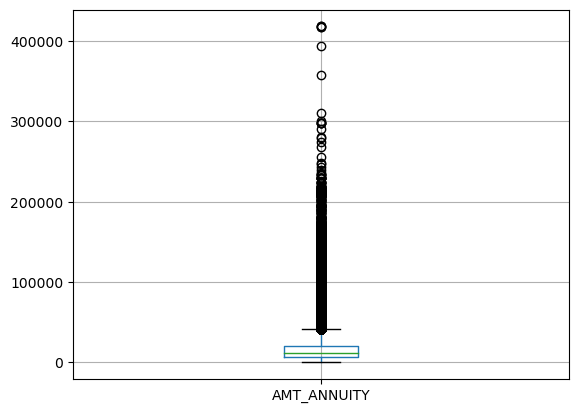

In [98]:
df2.boxplot(column=['AMT_ANNUITY'])
plt.show()

In [99]:
me=df2['AMT_ANNUITY'].median()
df2['AMT_ANNUITY'].fillna(me,inplace=True)

<Axes: ylabel='Frequency'>

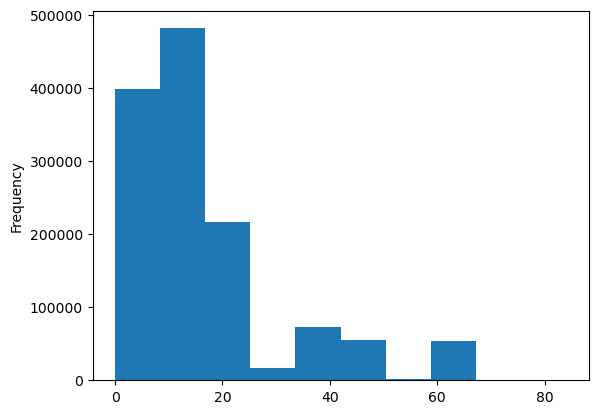

In [100]:
df2['CNT_PAYMENT'].plot.hist()

In [101]:
me=df2['CNT_PAYMENT'].median()
df2['CNT_PAYMENT'].fillna(me,inplace=True)

In [102]:
df2['PRODUCT_COMBINATION'].unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [103]:
mo=df2['PRODUCT_COMBINATION'].mode()[0]
df2['PRODUCT_COMBINATION'].fillna(mo,inplace=True)

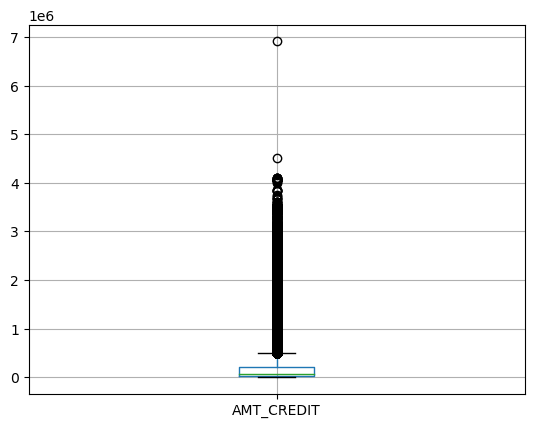

In [104]:
df2.boxplot(column=['AMT_CREDIT'])
plt.show()

In [105]:
me=df2['AMT_CREDIT'].median()
df2['AMT_CREDIT'].fillna(me,inplace=True)

In [106]:
df2.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

## Data Analysis

#### Univariate Analysis on Target=1 & Target=0 (Clients with Payment Difficulties) 

In [107]:
Target_1=df1.loc[df1['TARGET']==1]
Target_0=df1.loc[df1['TARGET']==0]

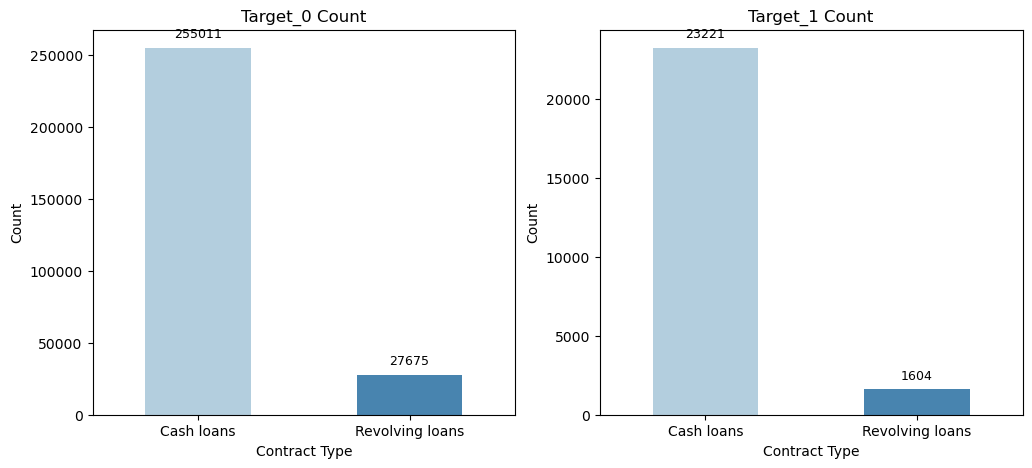

In [108]:
target_groups = [Target_0, Target_1]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, target_data in enumerate(target_groups):
    sns.countplot(x=target_data['NAME_CONTRACT_TYPE'], data=target_data, width=0.5, ax=axes[i],palette='Blues')
    axes[i].set_title(f'Target_{i} Count')
    axes[i].set_xlabel('Contract Type')
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

#Clients with Payment difficulties are observed from those who take Cash Loans

#### Univariate Analysis on Target=1 & Target=0 (Clients with Payment Difficulties by Gender)

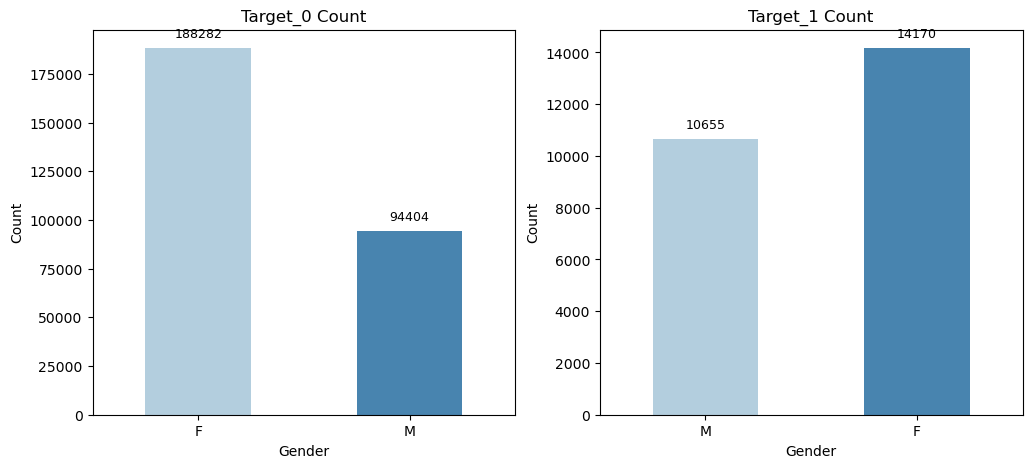

In [109]:
target_groups = [Target_0, Target_1]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, target_data in enumerate(target_groups):
    sns.countplot(x=target_data['CODE_GENDER'], data=target_data, width=0.5, ax=axes[i],palette='Blues')
    axes[i].set_title(f'Target_{i} Count')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

#Clients with Payment difficulties are observed most from Females

#### Univariate Analysis on Target=1 & Target=0 (Clients with Payment Difficulties by Education Type)

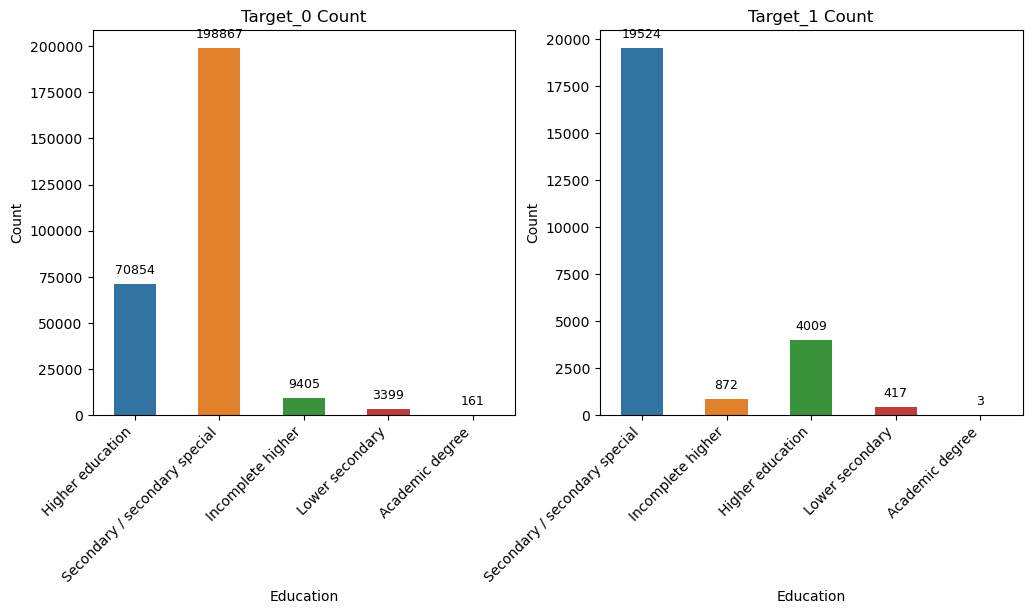

In [110]:
target_groups = [Target_0, Target_1]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, target_data in enumerate(target_groups):
    sns.countplot(x=target_data['NAME_EDUCATION_TYPE'], data=target_data, width=0.5, ax=axes[i])
    axes[i].set_title(f'Target_{i} Count')
    axes[i].set_xlabel('Education')
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
plt.show()

#Clients with Payment difficulties are observed from those whose education is Secondary School Education

#### Univariate Analysis on Target=1 & Target=0 (Clients with Payment Difficulties by Occupation)

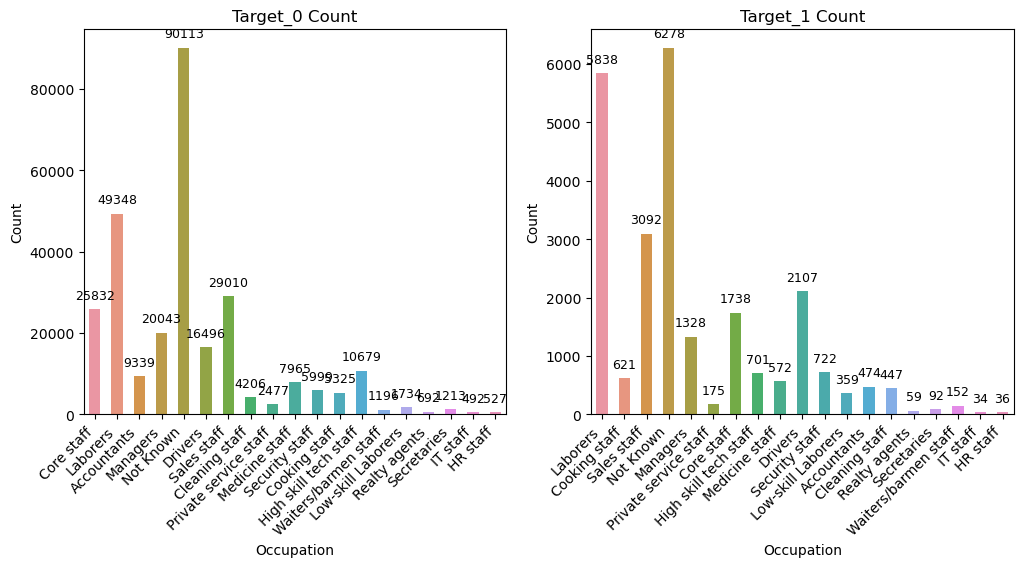

In [111]:
target_groups = [Target_0, Target_1]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, target_data in enumerate(target_groups):
    sns.countplot(x=target_data['OCCUPATION_TYPE'], data=target_data, width=0.5, ax=axes[i])
    axes[i].set_title(f'Target_{i} Count')
    axes[i].set_xlabel('Occupation')
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

#Clients with Payment difficulties are observed most from Occupation type Laborers

#### Univariate Analysis on Target=1 & Target=0 (Clients with Payment Difficulties by Region Rating)

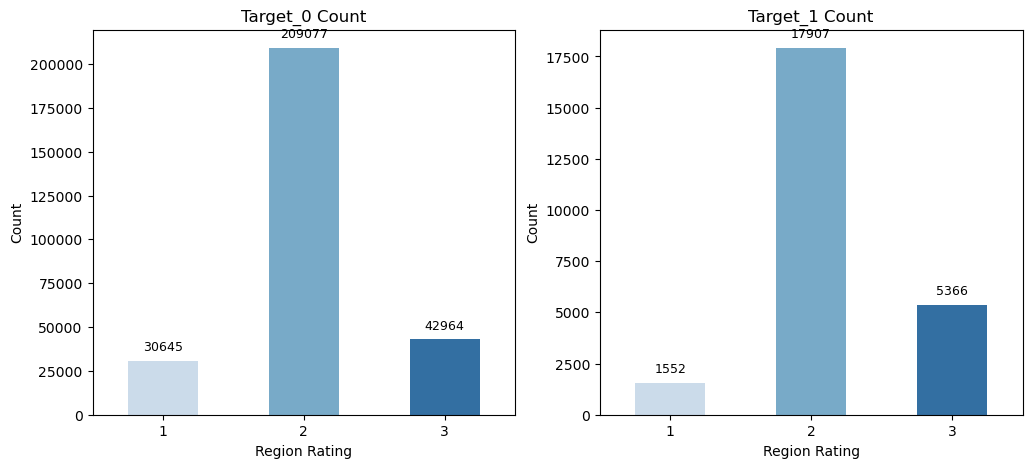

In [112]:
target_groups = [Target_0, Target_1]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, target_data in enumerate(target_groups):
    sns.countplot(x=target_data['REGION_RATING_CLIENT'], data=target_data, width=0.5, ax=axes[i],palette='Blues')
    axes[i].set_title(f'Target_{i} Count')
    axes[i].set_xlabel('Region Rating')
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

#Clients with Payment difficulties are observed from those living in Region Rating 2

#### Univariate Analysis on Target=1 & Target=0 (Clients with Payment Difficulties by Housing Type)

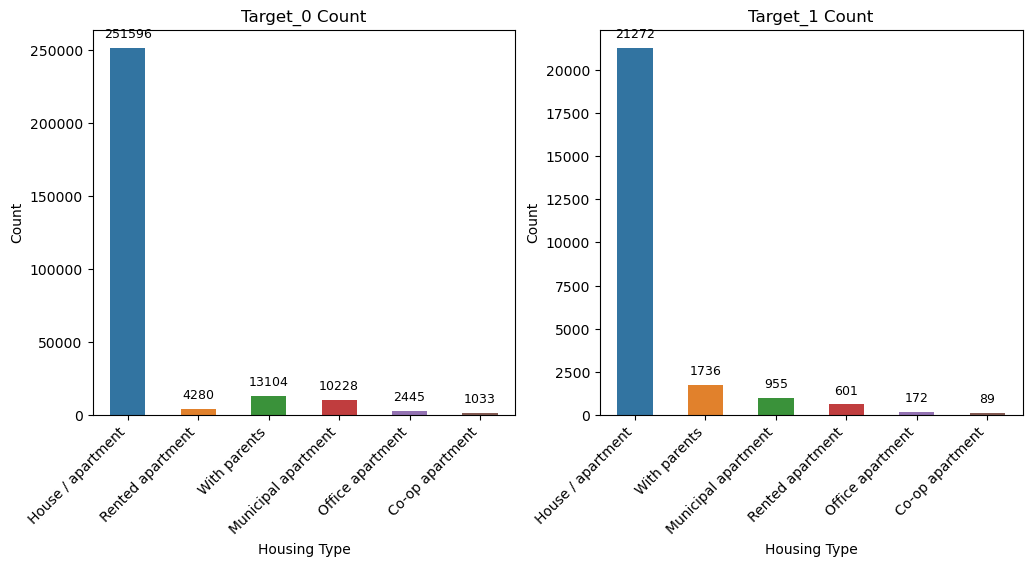

In [113]:
target_groups = [Target_0, Target_1]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, target_data in enumerate(target_groups):
    sns.countplot(x=target_data['NAME_HOUSING_TYPE'], data=target_data, width=0.5, ax=axes[i])
    axes[i].set_title(f'Target_{i} Count')
    axes[i].set_xlabel('Housing Type')
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
plt.show()

#Clients with Payment difficulties are observed from those who own House/Apartment and living with parents

#### Univariate Analysis on Target=1 & Target=0 (Clients with Payment Difficulties by Amount Annuity)

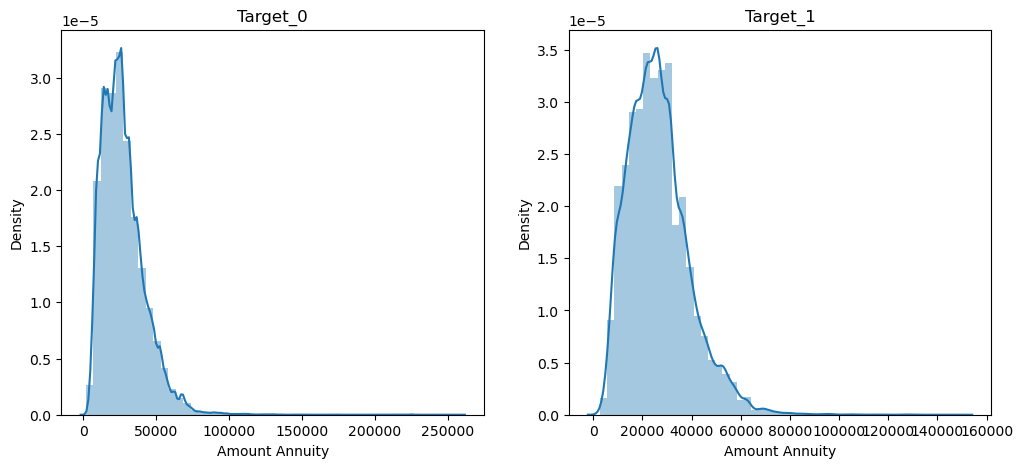

In [114]:
column_name = 'AMT_ANNUITY'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(Target_0['AMT_ANNUITY'], ax=axes[0])
axes[0].set_title('Target_0')
axes[0].set_xlabel('Amount Annuity')
axes[0].set_ylabel('Density')
sns.distplot(Target_1['AMT_ANNUITY'], ax=axes[1])
axes[1].set_title('Target_1')
axes[1].set_xlabel('Amount Annuity')
axes[1].set_ylabel('Density')
plt.show()

#Majority of the loans are from the clients whose Loan Annuity is Less than 50000. Similarly, most of the clients have payment difficulties whose whose Loan Annuity is Less than 50000.

#### Univariate Analysis on Target=1 & Target=0 (Clients with Payment Difficulties by Age Bins)

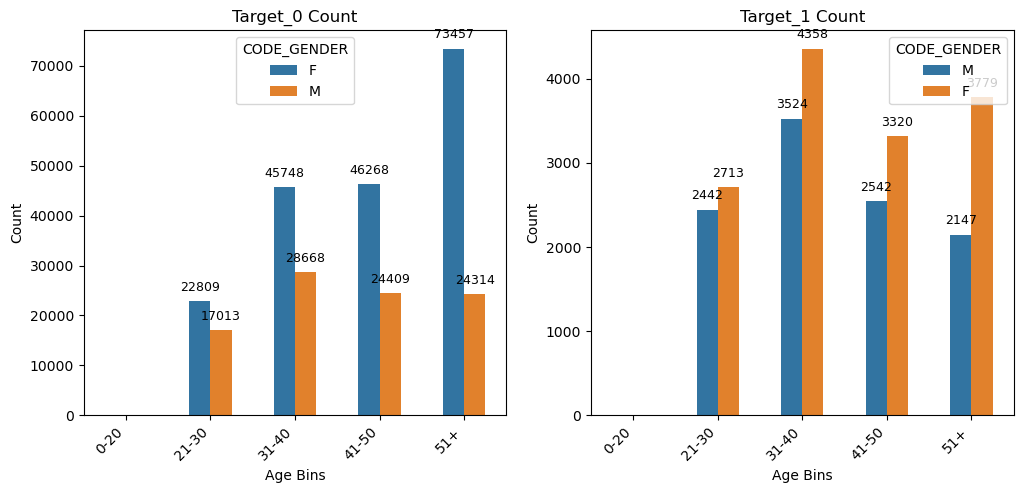

In [115]:
target_groups = [Target_0, Target_1]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, target_data in enumerate(target_groups):
    ax=sns.countplot(x=target_data['AGE_BINS'], data=target_data, width=0.5, hue='CODE_GENDER',ax=axes[i])
    axes[i].set_title(f'Target_{i} Count')
    axes[i].set_xlabel('Age Bins')
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
plt.show()

#Majority of the loans applied were from 51+ Years old Male clients. Whereas, 31-40 Years old clients have payment difficulties, especially Female clients are more compared to Male.

### Bivariate Analysis

#### Credit Amount vs Income Type

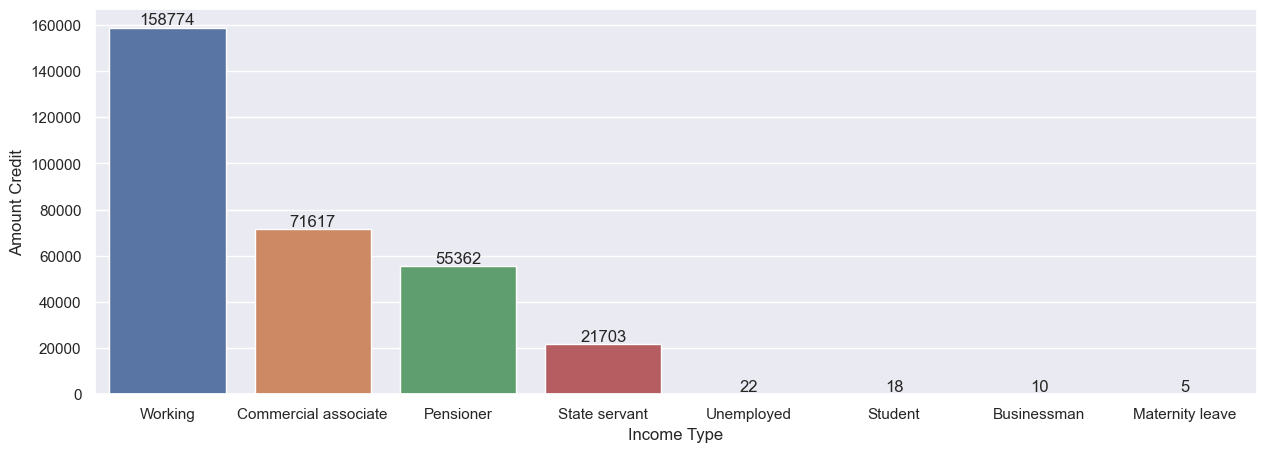

In [116]:
cre_inc=df1.groupby(['NAME_INCOME_TYPE'], as_index=False)['AMT_CREDIT'].count().sort_values(by='AMT_CREDIT',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=cre_inc,x='NAME_INCOME_TYPE',y='AMT_CREDIT')
for bars in ax.containers:
    ax.bar_label(bars)
    ax.set(xlabel='Income Type',ylabel='Amount Credit')

#Working class people have taken more loans who top the list under Income Type

#### Credit Amount vs Family Status

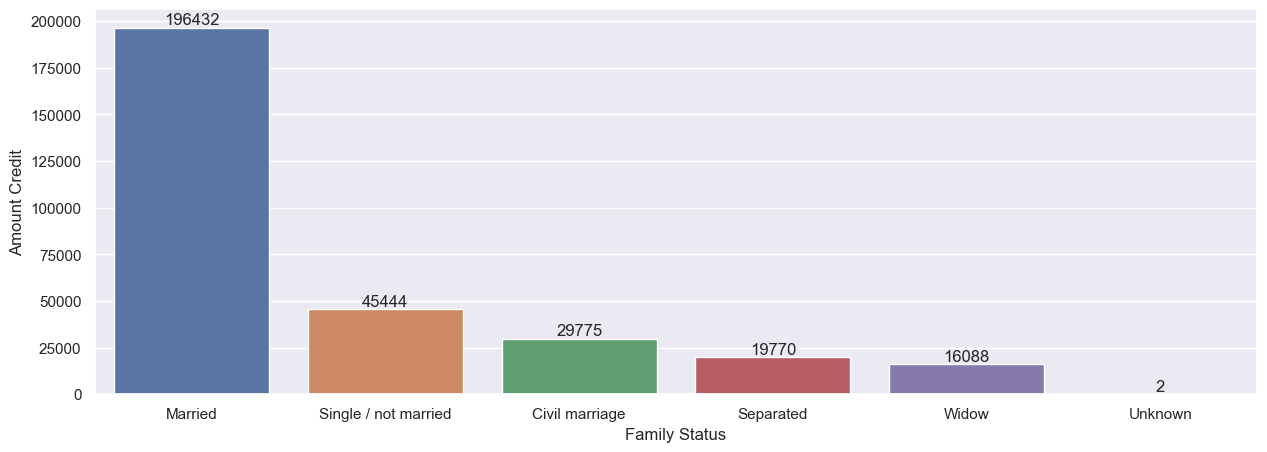

In [117]:
cre_fam=df1.groupby(['NAME_FAMILY_STATUS'], as_index=False)['AMT_CREDIT'].count().sort_values(by='AMT_CREDIT',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=cre_fam,x='NAME_FAMILY_STATUS',y='AMT_CREDIT')
for bars in ax.containers:
    ax.bar_label(bars)
    ax.set(xlabel='Family Status',ylabel='Amount Credit')

#Married people have taken more loans who top the list under Family Status

#### Credit Amount vs Goods Price

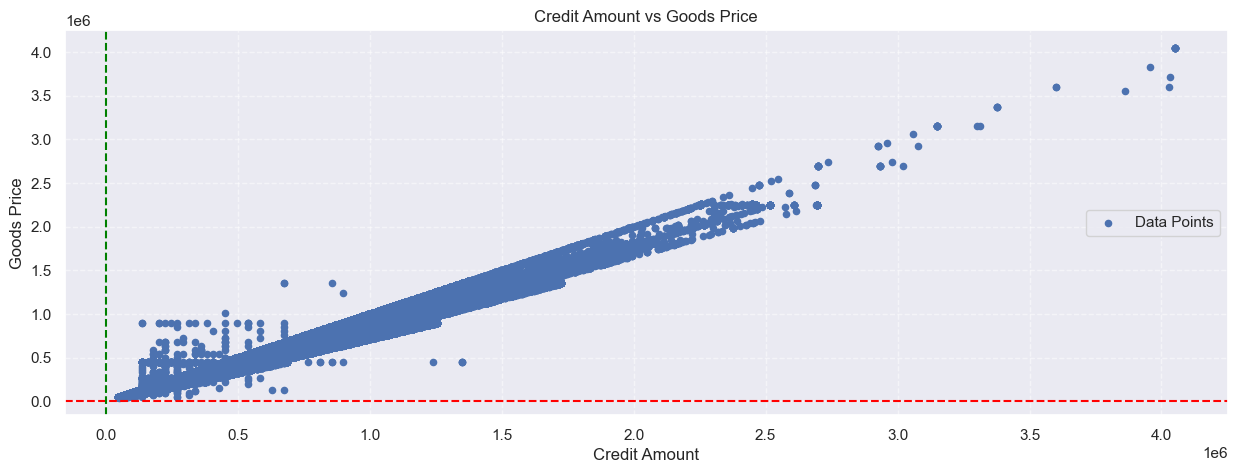

<Figure size 800x600 with 0 Axes>

In [118]:
ax=df1.plot.scatter(x='AMT_CREDIT', y='AMT_GOODS_PRICE',marker='o',label='Data Points')
ax.set_title('Credit Amount vs Goods Price')
ax.set_xlabel('Credit Amount')
ax.set_ylabel('Goods Price')
ax.legend(loc='best')
ax.grid(True, linestyle='--', alpha=0.5)
ax.axhline(0, color='red', linestyle='--')
ax.axvline(0, color='green', linestyle='--')
plt.figure(figsize=(8,6))
plt.show()

#Credit Amount has a positive correlation with Goods Price which shows negligible Loan to Risk Ratio

#### Correlation Matrix betwen Target, Days Birth, Amount Credit and Amount Income Total

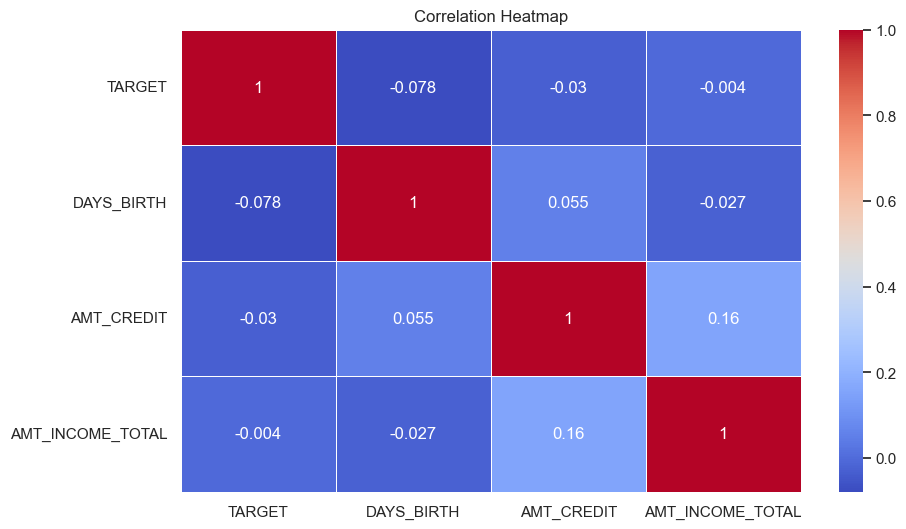

In [119]:
cols=df1[['TARGET','DAYS_BIRTH','AMT_CREDIT','AMT_INCOME_TOTAL']]
cor_matrix=cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Positive correlation found between Total Income and Credit Amount

## Insight

#### There is no strong trends, but as the income increase the amount credited has increased.And as the age increased the income has reduced.

### Social Media vs Credit Amount

#### Correlation Matrix betwen OBS_30, OBS_60, DEF_30, DEF60, Amount Credit & Amount Income

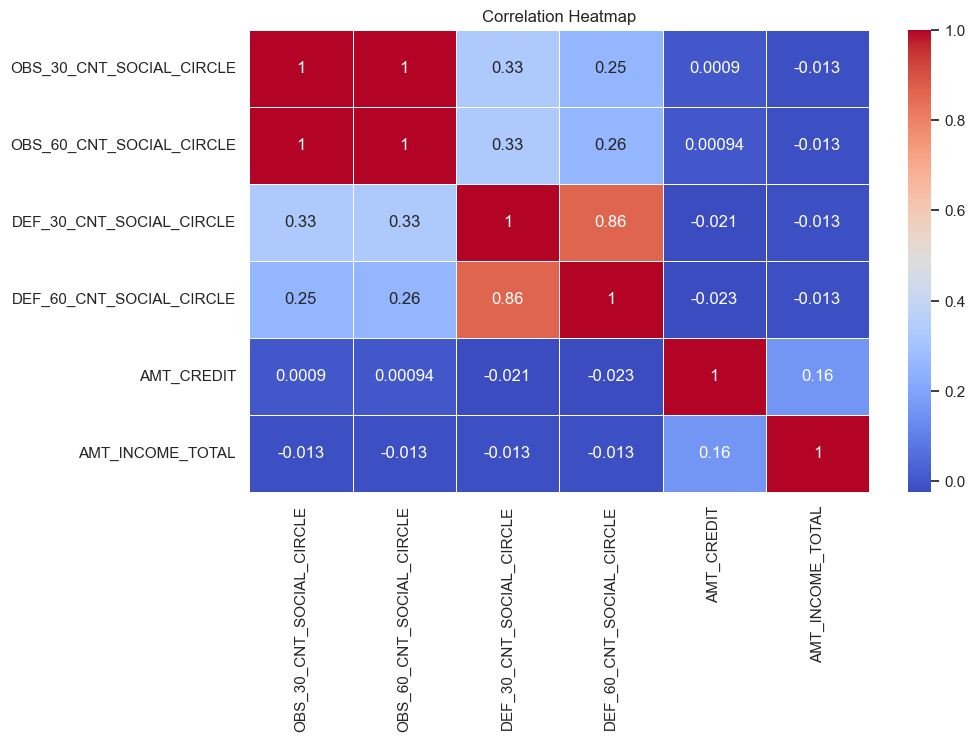

In [120]:
cols=df1[['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_CREDIT','AMT_INCOME_TOTAL']]
cor_matrix=cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Positive correlation found between (OBS_30, OBS_60) & (DEF_30, DEF_60)
#Minimal positive correlation found Amount Credit & Income Total

#### Finding Correlation between numeric variables

In [121]:
corr_matrix=df1[num_cols].corr()

In [122]:
corr_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000431,-0.000258,0.000849,0.001500,0.001369,...,0.000509,0.000167,0.001073,0.000282,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.004071
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012815,-0.039623,-0.037227,-0.078239,-0.047046,...,-0.007952,-0.001358,0.000215,0.003709,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021377,-0.001856,-0.025573,-0.330938,-0.241583,...,0.004031,0.000864,0.000988,-0.002450,0.000159,0.000107,-0.001083,-0.007983,-0.004913,-0.034874
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159632,0.074796,-0.027261,-0.063835,...,0.003130,0.002408,0.000242,-0.000589,0.001432,0.003481,0.003950,0.026746,0.007924,0.015821
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770127,0.986734,0.099738,0.055436,-0.064319,...,0.034329,0.021082,0.031023,-0.016148,-0.002366,0.005028,0.001634,0.055536,0.020379,-0.036634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002066,0.001701,0.000107,0.003481,0.005028,0.002286,0.005442,0.001160,-0.001018,0.000300,...,0.012956,0.001154,0.000078,-0.001076,0.230873,1.000000,0.218370,-0.002750,-0.001551,0.000742
AMT_REQ_CREDIT_BUREAU_WEEK,0.001879,-0.001306,-0.001083,0.003950,0.001634,0.013494,0.001880,-0.002335,0.004014,0.002567,...,-0.003666,-0.001006,-0.001239,-0.000057,0.006422,0.218370,1.000000,-0.007423,-0.007466,0.029318
AMT_REQ_CREDIT_BUREAU_MON,0.000328,-0.014794,-0.007983,0.026746,0.055536,0.037171,0.057337,0.071630,0.003580,-0.031550,...,-0.000179,-0.002230,0.002177,-0.003489,0.002973,-0.002750,-0.007423,1.000000,0.005318,0.013708
AMT_REQ_CREDIT_BUREAU_QRT,0.000809,-0.005833,-0.004913,0.007924,0.020379,0.010685,0.020811,-0.001873,0.016281,0.013521,...,-0.003362,-0.001079,0.000034,-0.002066,0.000725,-0.001551,-0.007466,0.005318,1.000000,0.095723


In [123]:
max_pos_corr=corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
max_neg_corr=corr_matrix.unstack().sort_values(ascending=True).drop_duplicates()
print("Maximum Positive Correlation:", max_pos_corr.iloc[1])
print("Corresponding Positive Variables:", max_pos_corr.index[1])
print()
print("Maximum Negative Correlation:", max_neg_corr.iloc[1])
print("Corresponding Negative Variables:", max_neg_corr.index[1])

Maximum Positive Correlation: 0.9984912890365444
Corresponding Positive Variables: ('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE')

Maximum Negative Correlation: -0.6198876962023361
Corresponding Negative Variables: ('DAYS_BIRTH', 'FLAG_EMP_PHONE')


#### Correlation with TARGET

In [124]:
cor=df1.corr()
cor['TARGET'].sort_values(ascending=True)

EXT_SOURCE_2                  -0.160295
EXT_SOURCE_3                  -0.155892
AGE                           -0.078239
DAYS_BIRTH                    -0.078239
DAYS_LAST_PHONE_CHANGE        -0.055217
                                 ...   
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, Length: 62, dtype: float64

In [125]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.92,21-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.93,41-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.18,51+
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.07,51+
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.61,51+


In [126]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


#### Merge df1 and df2

In [127]:
merged_df = pd.merge(df1, df2, on='SK_ID_CURR', how='inner')

In [128]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


#### Contract Status vs Rejection Reason

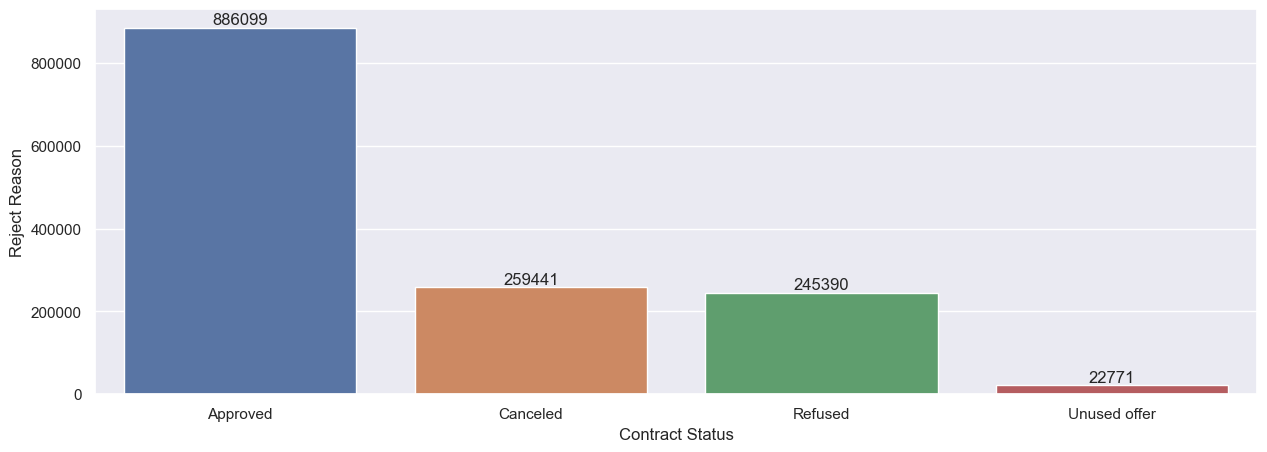

In [129]:
con_rej=merged_df.groupby(['NAME_CONTRACT_STATUS'], as_index=False)['CODE_REJECT_REASON'].count().sort_values(by='CODE_REJECT_REASON',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=con_rej,x='NAME_CONTRACT_STATUS',y='CODE_REJECT_REASON')
for bars in ax.containers:
    ax.bar_label(bars)
    ax.set(xlabel='Contract Status',ylabel='Reject Reason')

#Majority of the loans are approved when compared to Canceled and Refused

#### Code Rejection Reason Count

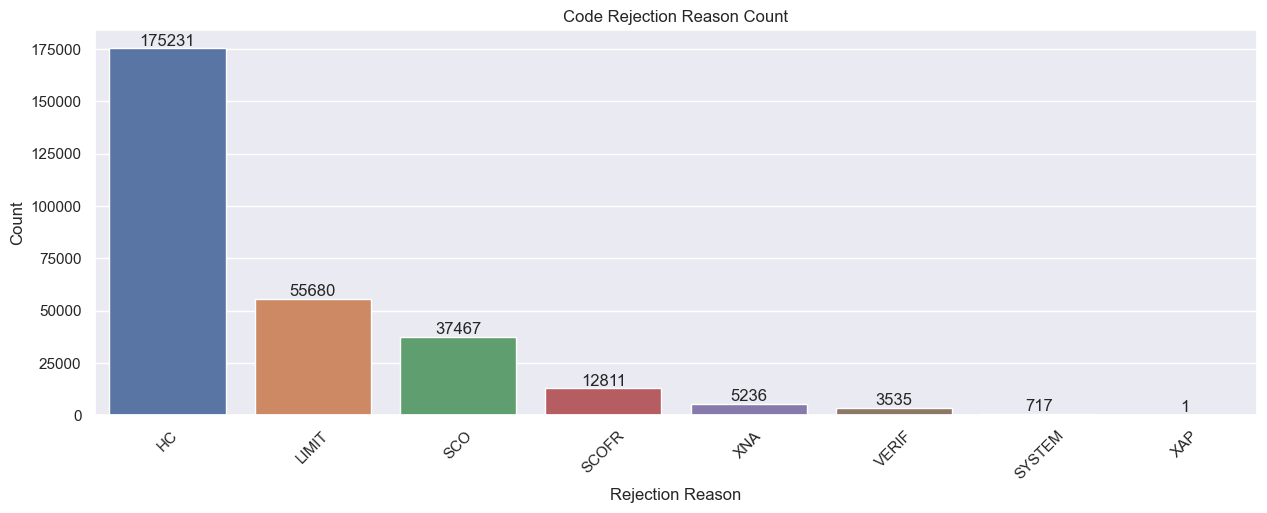

In [130]:
ref_df = df2[df2['NAME_CONTRACT_STATUS'] == 'Refused']

reason_counts = ref_df['CODE_REJECT_REASON'].value_counts().reset_index()
reason_counts.columns = ['CODE_REJECT_REASON', 'Count']
reason_counts = reason_counts.sort_values(by='Count', ascending=False)
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=reason_counts, x='CODE_REJECT_REASON', y='Count', ci=None, order=reason_counts['CODE_REJECT_REASON'])
plt.title('Code Rejection Reason Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
ax.set(xlabel='Rejection Reason', ylabel='Count')
plt.xticks(rotation=45)
plt.show()

#High Credit, Limit & SCO are the top Credit Rejection reasons

#### Name Contract Status and Code Reject Reason

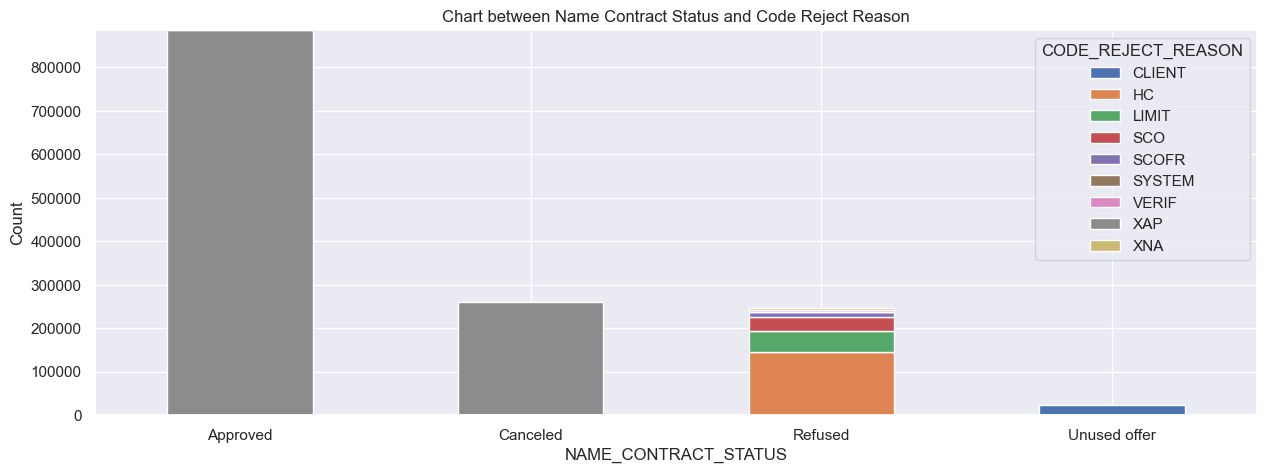

In [131]:
cross_tab = pd.crosstab(merged_df['NAME_CONTRACT_STATUS'], merged_df['CODE_REJECT_REASON'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Chart between Name Contract Status and Code Reject Reason')
plt.xlabel('NAME_CONTRACT_STATUS')
plt.ylabel('Count')
plt.legend(title='CODE_REJECT_REASON', loc='upper right')
plt.xticks(rotation=0)
plt.show()

#Applications are refused for the applicants whose Reject Reason Codes are: CLIENT, SCO, LIMIT, HC.
#Most of the Applications are approved and few were cancelled whose Reject Reason Code is: XNA

#### Loans refused the most

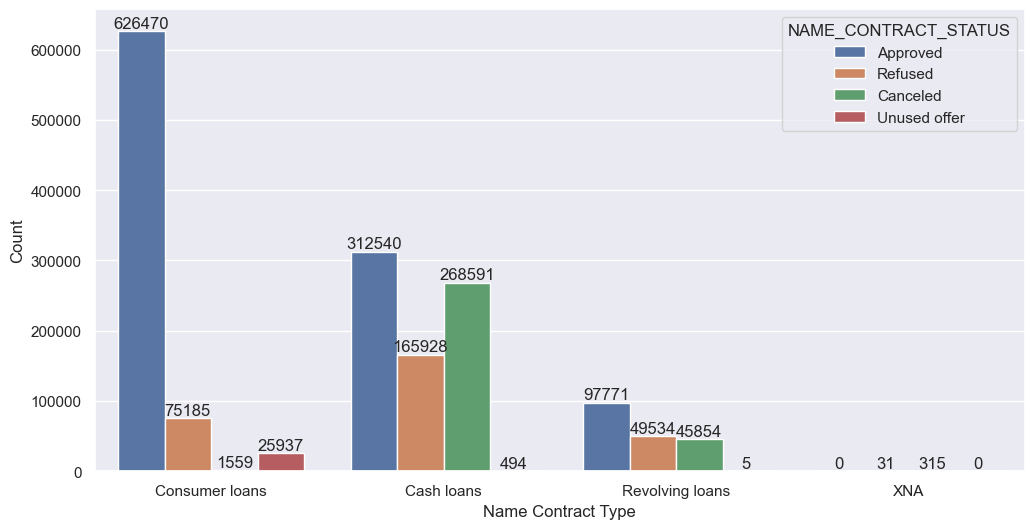

In [132]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df2, x='NAME_CONTRACT_TYPE', hue='NAME_CONTRACT_STATUS')
for bars in ax.containers:
    ax.bar_label(bars)
    ax.set(xlabel='Name Contract Type',ylabel='Count')
plt.show()

#Cash Loans were refused for more Cash Loans and Revolving loans than Consumer loans

In [ ]:
# Calculate the mean of 'EXT_SOURCE_1', 'EXT_SOURCE_2', and 'EXT_SOURCE_3'
merged['MEAN_EXT_SOURCE'] = merged[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

# Plot 'MEAN_EXT_SOURCE' against 'TARGET'
plt.figure(figsize=(8, 6))
sns.histplot(data=merged, x='MEAN_EXT_SOURCE', hue='TARGET', kde=True, bins=30)
plt.title('Distribution of Mean EXT_SOURCE by TARGET')
plt.xlabel('Mean EXT_SOURCE')
plt.show()